### Imports

In [ ]:
# includes
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import sys, os, glob, shutil
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import sys
import os
import time
from tensorflow.keras.applications import Xception 
from  tensorflow.keras.applications import  MobileNetV2

### Classes

In [ ]:
# classes
classnames=['Earthquake','fire']

### Model

In [ ]:
# model
mobilenet_model=MobileNetV2(include_top=False,input_shape=(250,250,3),classes=2)

In [ ]:
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 125, 125, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 125, 125, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 125, 125, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Data Set

In [ ]:
# remove training layers
for layer in mobilenet_model.layers:
    layer.trainable = False


In [ ]:
## get datset from drive
!gdown --id 1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q

Downloading...
From: https://drive.google.com/uc?id=1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q
To: /content/Cyclone_Wildfire_Flood_Earthquake_Database.zip
29.9MB [00:00, 16.4MB/s]

In [ ]:
!unzip Cyclone_Wildfire_Flood_Earthquake_Database.zip

Archive:  Cyclone_Wildfire_Flood_Earthquake_Database.zip
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/0.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/1.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/10.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/100.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/101.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/102.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/103.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/104.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/105.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/106.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/107.jpg  
  inflating:

In [ ]:
!gdown --id 1igqvWvKH2SYj7xH2frrIo4ZXq_eNHd3E

Downloading...
From: https://drive.google.com/uc?id=1igqvWvKH2SYj7xH2frrIo4ZXq_eNHd3E
To: /content/Wildfire.zip
215MB [00:03, 69.4MB/s]


In [ ]:
!unzip Wildfire.zip

Archive:  Wildfire.zip
replace Wildfire/fire.10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!gdown --id 1RTZCcj6J--lSe8kEWNuaPjhKulSFoM_T

Downloading...
From: https://drive.google.com/uc?id=1RTZCcj6J--lSe8kEWNuaPjhKulSFoM_T
To: /content/archive-20210607T174105Z-001.zip
364MB [00:05, 64.7MB/s]


In [ ]:
!unzip archive-20210607T174105Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive/natural_images/airplane/airplane_0685.jpg  
  inflating: archive/natural_images/motorbike/motorbike_0205.jpg  
  inflating: archive/data/natural_images/dog/dog_0170.jpg  
  inflating: archive/natural_images/airplane/airplane_0618.jpg  
  inflating: archive/natural_images/airplane/airplane_0443.jpg  
  inflating: archive/natural_images/airplane/airplane_0120.jpg  
  inflating: archive/natural_images/airplane/airplane_0517.jpg  
  inflating: archive/natural_images/airplane/airplane_0496.jpg  
  inflating: archive/data/natural_images/dog/dog_0208.jpg  
  inflating: archive/natural_images/airplane/airplane_0004.jpg  
  inflating: archive/natural_images/airplane/airplane_0166.jpg  
  inflating: archive/data/natural_images/dog/dog_0305.jpg  
  inflating: archive/data/natural_images/dog/dog_0297.jpg  
  inflating: archive/data/natural_images/dog/dog_0188.jpg  
  inflating: archive/data/natural_images/dog/dog_0291.jpg  
  

### Get only two classes

In [ ]:
datase=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/fire_Earthquake',
    labels="inferred",
    label_mode="categorical",
    class_names=classnames,
    color_mode="rgb",
    batch_size=32,
    image_size=(250, 250),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
   
)

Found 3181 files belonging to 2 classes.
Using 2863 files for training.


In [ ]:
testdata=datase=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/fire_Earthquake',
    labels="inferred",
    label_mode="categorical",
    class_names=classnames,
    color_mode="rgb",
    image_size=(250, 250),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
   
)

Found 3181 files belonging to 2 classes.
Using 318 files for validation.


### Change Model architecture

In [ ]:
base_inputs = mobilenet_model.layers[0].input
base_output = mobilenet_model.layers[-4].output

In [ ]:
output=keras.layers.Flatten()(base_output)

In [ ]:
output=keras.layers.Dense(512,activation='relu')(output)

In [ ]:
output=keras.layers.Dense(2, activation='softmax')(output)

In [ ]:
newModel = keras.Model(inputs=base_inputs, outputs=output)

In [ ]:
newModel .compile(
  optimizer='adam', 
              metrics=["accuracy"],
    loss=keras.losses.CategoricalCrossentropy(),
  
)

In [ ]:
newModel.fit_generator(datase,epochs=30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 21s 2s/step - loss: 19.1420 - accuracy: 0.6887
Epoch 2/30
10/10 [==============================] - 16s 1s/step - loss: 2.4511 - accuracy: 0.9214
Epoch 3/30
10/10 [==============================] - 18s 2s/step - loss: 1.2823 - accuracy: 0.9214
Epoch 4/30
10/10 [==============================] - 17s 2s/step - loss: 0.2985 - accuracy: 0.9686
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 0.0950 - accuracy: 0.9811
Epoch 6/30
10/10 [==============================] - 17s 2s/step - loss: 0.0559 - accuracy: 0.9811
Epoch 7/30
10/10 [==============================] - 18s 2s/step - loss: 0.0080 - accuracy: 0.9937
Epoch 8/30
10/10 [==============================] - 18s 2s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - 18s 2s/step - loss: 2.0091e-04 - accuracy: 1.0000
Epoch 10/30
10/10 [==============================] - 19s 2s/step - loss: 6.1488e-05 - accuracy: 1.0000
Epoch 11/3

In [ ]:
newModel.evaluate_generator(testdata)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
newModel.predict(testdata)

array([[1.00000000e+00, 0.00000000e+00],
       [1.74048151e-21, 1.00000000e+00],
       [7.85262018e-05, 9.99921441e-01],
       [1.00000000e+00, 3.12120928e-25],
       [2.75906921e-21, 1.00000000e+00],
       [5.30417543e-04, 9.99469578e-01],
       [8.73741690e-10, 1.00000000e+00],
       [1.00000000e+00, 9.17583438e-27],
       [1.00000000e+00, 3.98397511e-08],
       [1.00000000e+00, 7.19302580e-34],
       [3.85061818e-12, 1.00000000e+00],
       [8.07113975e-05, 9.99919295e-01],
       [1.26979209e-03, 9.98730242e-01],
       [3.69742598e-10, 1.00000000e+00],
       [6.22503222e-08, 9.99999881e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.25082826e-21],
       [1.00000000e+00, 1.23972610e-13],
       [1.00000000e+00, 1.12894917e-17],
       [9.98692811e-01, 1.30723487e-03],
       [1.00000000e+00, 9.79028831e-38],
       [2.78898065e-16, 1.00000000e+00],
       [2.25199481e-09, 1.00000000e+00],
       [9.99999881e-01, 8.02568465e-08],
       [2.358508

### Check some random samples 

In [ ]:
## samples not used in training & validation

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/fire.jpeg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[0.20228513 0.7977148 ]]
fire


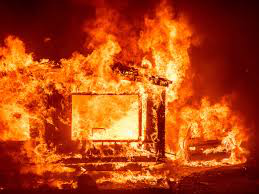

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/images.jpeg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[1.2521645e-13 1.0000000e+00]]
fire


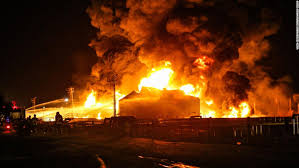

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/download.jpeg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[9.9946636e-01 5.3363841e-04]]
Earthquake


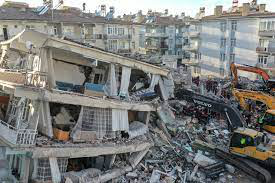

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/images (1).jpg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[1.2553718e-06 9.9999869e-01]]
fire


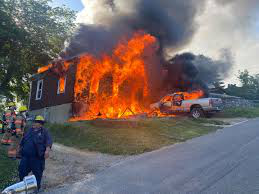

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/download.jpg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[0.43550736 0.56449264]]
fire


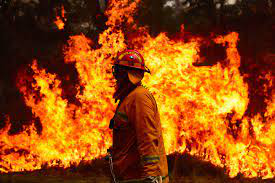

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/download (1).jpg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[2.9873103e-08 1.0000000e+00]]
fire


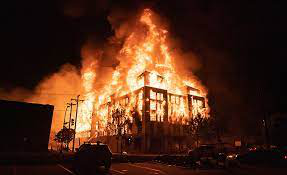

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:
x_test =tf.keras.preprocessing.image.load_img('/content/images (4).jpg')
xnumpy = np.array(x_test)
xtst = np.array(x_test.resize((250, 250))) / 255.
xtst = xtst.reshape(1, 250, 250, 3)

[[0.9902536  0.00974638]]
Earthquake


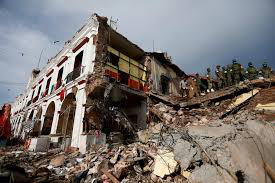

In [ ]:
newModel.predict(xtst)
print(newModel.predict(xtst))
print(classnames[np.argmax(newModel.predict(xtst))])
x_test

In [ ]:

t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)
newModel.save(export_path_keras)

./1623099255.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!ls

 1623099255.h5					  newfolder
 archive-20210607T174105Z-001.zip		  nothing
 Cyclone_Wildfire_Flood_Earthquake_Database	  ok
 Cyclone_Wildfire_Flood_Earthquake_Database.zip   sample_data
 Data						  stop
 download.jpeg					 'Untitled Folder'
 fire.jpeg					  Wildfire.zip
 images.jpeg


In [ ]:
import time
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tensorflow.keras import layers

In [ ]:
reloaded = tf.keras.models.load_model(
  export_path_keras, 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

reloaded.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 125, 125, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 125, 125, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 125, 125, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

### Export Model

In [ ]:
t = time.time()
export_path_sm = "./{}".format(int(t))
print(export_path_sm)
tf.saved_model.save(newModel, export_path_sm)

./1623099535


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ./1623099535/assets


In [ ]:
reloaded_sm = tf.saved_model.load(export_path_sm)

In [ ]:
!zip -r  newModel.zip {export_path_sm}

  adding: 1623099535/ (stored 0%)
  adding: 1623099535/variables/ (stored 0%)
  adding: 1623099535/variables/variables.index (deflated 77%)
  adding: 1623099535/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: 1623099535/assets/ (stored 0%)
  adding: 1623099535/saved_model.pb (deflated 92%)


In [ ]:
!ls

 1623099255.h5					  Mydebug.zip
 1623099535					  newfolder
 archive-20210607T174105Z-001.zip		  nothing
 Cyclone_Wildfire_Flood_Earthquake_Database	  ok
 Cyclone_Wildfire_Flood_Earthquake_Database.zip   sample_data
 Data						  stop
 download.jpeg					 'Untitled Folder'
 fire.jpeg					  Wildfire.zip
 images.jpeg


In [ ]:
try:
  from google.colab import files
  files.download('./output.zip')
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>